# Patterns of Variation in Feature Spaces
This notebook corresponds to the case study 'Patterns of Variation in Feature Spaces' from the paper.

In [20]:
import model
import dataloader as dl
import numpy as np
import trainer
import parameters as p
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import torch


datasets = ['german'] # magic04
model_type = 'hinge_oco'

torch.manual_seed(p.random_state)
np.random.seed(p.random_state)


def experiment(cov_strength):
    p.cov_strength = cov_strength
    print("cov. strength set to " + str(cov_strength))
    # initialize the dicts for collecting results
    results = {}
    masks = {}
    occurrences = {}
    losses = {}
    errors = {}

    for dataset in datasets:
        results[dataset] = {}
        masks[dataset] = {}
        losses[dataset] = {}
        errors[dataset] = {}

        for scenario in p.scenarios:
            results[dataset][scenario] = 0
            masks[dataset][scenario] = []
            losses[dataset][scenario] = []
            errors[dataset][scenario] = []

    # run the experiments
    for scenario in p.scenarios:
        for dataset_name in datasets:
            Xpath, ypath = dl.get_path(dataset_name)
            X, y = dl.read_dataset(Xpath, ypath)
            num_features = len(X[0])
            m = p.models[model_type](num_features, p.learning_rate)
            fold_errors, fold_losses, fold_weights, fold_masks, error_lists = trainer.cross_validation(X, y, m, p.folds, p.scenarios[scenario])
            masks[dataset_name][scenario] = fold_masks
            losses[dataset_name][scenario] = fold_losses
            errors[dataset_name][scenario] = error_lists
            results[dataset_name][scenario] = np.mean(fold_errors)
            print(dataset_name, scenario, model_type, np.mean(fold_errors))
        print()
        
    return results, masks, losses, errors

In [21]:
results, masks, losses, errors = experiment(0.0)

cov. strength set to 0.0
german varying_gaussian hinge_oco 0.43630000000000013

german varying_gaussian +.25 hinge_oco 0.49395

german varying_gaussian +.50 hinge_oco 0.5303

german varying_gaussian +.75 hinge_oco 0.5519000000000001

german varying_uniform hinge_oco 0.3025

german full hinge_oco 0.3015



In [35]:
# accumulating loss
# averages with sterr.

import pandas as pd
import seaborn as sns

data = []

# convert the dictionary of losses to a dataframe
    # columns: Scenario - timepoint - fold - value - dataset
for dataset_name in losses:
    for scenario in losses[dataset_name]:
        for fold in range(len(losses[dataset_name][scenario])):
            # calculate accumulating losses
            acc_loss = []
            acc_sum = 0
            
            for timepoint in range(len(losses[dataset_name][scenario][fold])):
                acc_sum += losses[dataset_name][scenario][fold][timepoint]
                acc_loss.append(acc_sum / float(timepoint + 1))
                
            for timepoint2 in range(len(losses[dataset_name][scenario][fold])):    
                value = acc_loss[timepoint2]
                if timepoint2 % 20 == 0:
                    row = [scenario, timepoint2, fold, dataset_name, value]
                    data.append(row)

df = pd.DataFrame(data, columns=['scenario', 'instance', 'fold', 'dataset', 'acc. loss'])



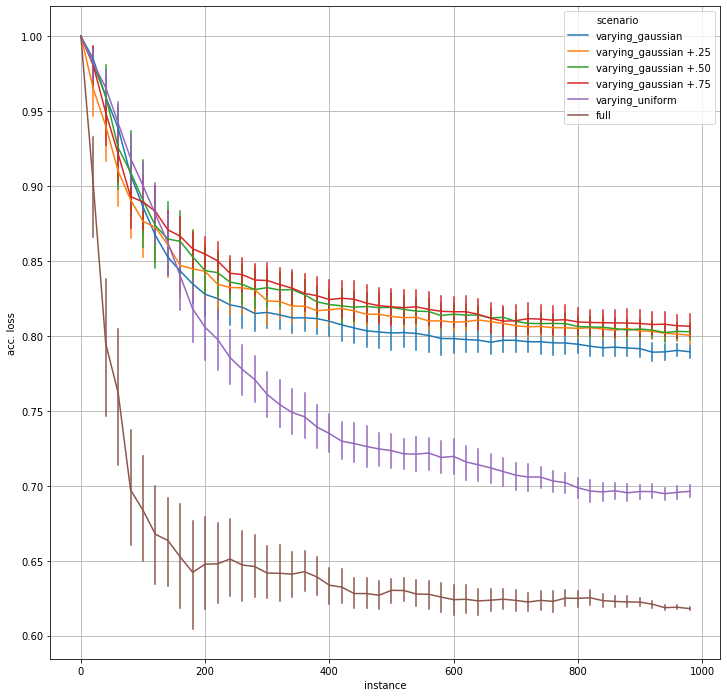

In [36]:
f, ax = plt.subplots(figsize=(12, 12))
sns.lineplot(
    data=df, x="instance", y="acc. loss", hue="scenario", err_style="bars", ci=95, ax=ax
)
plt.grid()

In [37]:
# accumulating loss
# averages with sterr.

import pandas as pd
import seaborn as sns

data = []

# convert the dictionary of losses to a dataframe
    # columns: Scenario - timepoint - fold - value - dataset
for dataset_name in errors:
    for scenario in errors[dataset_name]:
        for fold in range(len(errors[dataset_name][scenario])):
            # calculate accumulating losses
            acc_loss = []
            acc_sum = 0
            
            for timepoint in range(len(errors[dataset_name][scenario][fold])):
                acc_sum += errors[dataset_name][scenario][fold][timepoint]
                acc_loss.append(acc_sum / float(timepoint + 1))
                
            for timepoint2 in range(len(errors[dataset_name][scenario][fold])):    
                value = acc_loss[timepoint2]
                if timepoint2 % 20 == 0:
                    row = [scenario, timepoint2, fold, dataset_name, value]
                    data.append(row)

df = pd.DataFrame(data, columns=['scenario', 'instance', 'fold', 'dataset', 'acc. error (log)'])




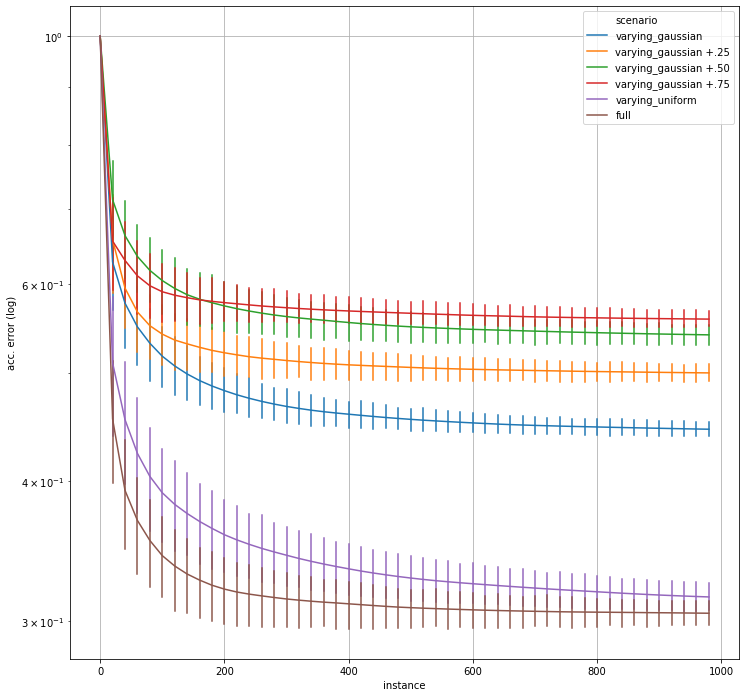

In [38]:
f, ax = plt.subplots(figsize=(12, 12))
ax.set(yscale="log")

sns.lineplot(
    data=df, x="instance", y="acc. error (log)", hue="scenario", err_style="bars", ci=95, ax=ax
)
plt.grid()

In [39]:
df

,scenario,instance,fold,dataset,acc. error (log)
0,varying_gaussian,0,0,german,1.000000
1,varying_gaussian,20,0,german,0.824986
2,varying_gaussian,40,0,german,0.686215
3,varying_gaussian,60,0,german,0.627364
4,varying_gaussian,80,0,german,0.597326
...,...,...,...,...,...
5995,full,900,19,german,0.302836
5996,full,920,19,german,0.302889
5997,full,940,19,german,0.302921
5998,full,960,19,german,0.302894


In [34]:
df

,scenario,instance,fold,dataset,acc. error (log)
0,varying_gaussian,0,0,german,1.000000
1,varying_gaussian,20,0,german,0.824986
2,varying_gaussian,40,0,german,0.686215
3,varying_gaussian,60,0,german,0.627364
4,varying_gaussian,80,0,german,0.597326
...,...,...,...,...,...
5995,full,900,19,german,0.302836
5996,full,920,19,german,0.302889
5997,full,940,19,german,0.302921
5998,full,960,19,german,0.302894
